In [2]:
print(__doc__)

import time as time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

Automatically created module for IPython interactive environment


In [3]:
# #############################################################################
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# #############################################################################
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = label

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)

#Оценка аггломеративной кластеризации без учета матрицы связности
from sklearn import metrics
labels_true = y
labels_pred = label
print("Adjusted random score is %f" %metrics.adjusted_rand_score(labels_true, labels_pred))

Compute unstructured hierarchical clustering...
Elapsed time: 0.34s
Number of points: 150
Adjusted random score is 0.731199


In [5]:
# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=30, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

#Оценка аггломеративной кластеризации с матрицей связности
from sklearn import metrics
labels_true = y
labels_pred = label
print("Adjusted random score is %f" %metrics.adjusted_rand_score(labels_true, labels_pred))

Compute structured hierarchical clustering...
Elapsed time: 0.16s
Number of points: 150
Adjusted random score is 0.731199


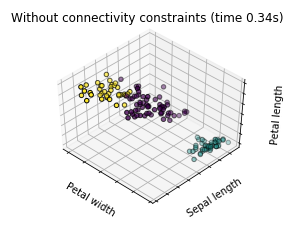

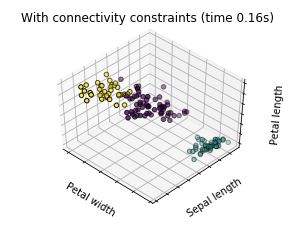

In [6]:
# #############################################################################
# Plot result
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = label

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)
plt.show()

## Иерархическая кластеризация на примере digits dataset

In [7]:
# #############################################################################
digits = datasets.load_digits()
X = digits.data
y = digits.target

Compute unstructured hierarchical clustering...
Elapsed time: 0.18s
Number of points: 1797


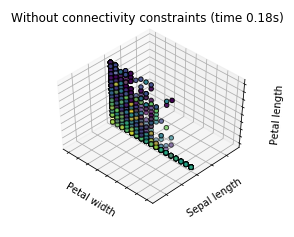

Adjusted random score is 0.794003


In [8]:
# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = label

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)
plt.show()

#Оценка аггломеративной кластеризации без учета матрицы связности
from sklearn import metrics
labels_true = y
labels_pred = label
print("Adjusted random score is %f" %metrics.adjusted_rand_score(labels_true, labels_pred))

In [9]:
# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=30, include_self=False)

In [12]:
# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...") # 
st = time.time()
ward = AgglomerativeClustering(n_clusters=10, connectivity=connectivity, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

#Оценка аггломеративной кластеризации с матрицей связности
from sklearn import metrics
labels_true = y
labels_pred = label
print("Adjusted random score is %f" %metrics.adjusted_rand_score(labels_true, labels_pred)) # измеряет сходство двух назначений, игнорируя перестановки и случайную нормализацию
print("Adjusted mutual score is %f" %metrics.adjusted_mutual_info_score(labels_true, labels_pred)) # измеряет согласование двух назначений, игнорируя перестановки
print("V_measure score is %f" %metrics.v_measure_score(labels_true, labels_pred)) # гармоническое среднее
labels_true = y.reshape(-1, 1)
print("Silhouette score is %f" %metrics.silhouette_score(labels_true, labels_pred)) # оценка выбора количества кластеров

Compute structured hierarchical clustering...
Elapsed time: 0.51s
Number of points: 1797
Adjusted random score is 0.792539
Adjusted mutual score is 0.853703
V_measure score is 0.865665
Silhouette score is 0.447781


In [13]:
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

labels_true = y
labels_pred = label
print("Adjusted random score is %f" %metrics.adjusted_rand_score(labels_true, labels_pred))
print("Adjusted mutual score is %f" %metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("V_measure score is %f" %metrics.v_measure_score(labels_true, labels_pred))
labels_true = y.reshape(-1, 1)
print("Silhouette score is %f" %metrics.silhouette_score(labels_true, labels_pred))

Compute unstructured hierarchical clustering...
Elapsed time: 0.18s
Number of points: 1797
Adjusted random score is 0.794003
Adjusted mutual score is 0.856085
V_measure score is 0.868170
Silhouette score is 0.449743
